# 대중교통 데이터 프로젝트
## 대중교통 데이터 시각화 하기

In [1]:
# 데이터는 티머니에서 제공하는 대중교통 비용에 대한 통계자료로, '지하철 유무임별 이용현황'을 이용
# 데이터 확인하기
import csv
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

for row in data:
    for i in range(4, 8):
        row[i]= int(row[i])
    print(row)


['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937]
['2021-01', '1호선', '10', '동묘앞', 98645, 105308, 113919, 115644]
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433]
['2021-01', '1호선', '3', '종각', 598363, 567563, 84544, 78565]
['2021-01', '1호선', '4', '종로3가', 313943, 281737, 187603, 175431]
['2021-01', '1호선', '5', '종로5가', 292654, 292561, 174460, 166963]
['2021-01', '1호선', '6', '동대문', 168863, 158577, 84638, 83489]
['2021-01', '1호선', '7', '신설동', 219283, 218343, 82995, 79139]
['2021-01', '1호선', '8', '제기동', 195353, 192588, 204956, 219996]
['2021-01', '1호선', '9', '청량리(서울시립대입구)', 266539, 264050, 205089, 206452]
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974]
['2021-01', '2호선', '12', '을지로입구', 739976, 744333, 66638, 62076]
['2021-01', '2호선', '13', '을지로3가', 373645, 363847, 51829, 49872]
['2021-01', '2호선', '14', '을지로4가', 205245, 201486, 73038, 72596]
['2021-01', '2호선', '15', '동대문역사문화공원(DDP)', 209129, 235813, 36571, 37954]
['2021-01', '2호선', '16', '신당', 239931, 2497

### 유임 승차 비율이 높은 역 확인하기
* 유임승차 비율 = 유임승차 인원 / 무임승차 인원
* 모든 역의 데이터를 바탕으로 1) 각 역의 유임승차 비율을 계산한 후, 2) 비율이 가장 높은 역을 찾아 3) 출력할 것.

In [2]:
# 무임승차인원에 0이 존재
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    rate=row[4]/row[6]
    if rate > mx :
        mx = rate
print(mx)


ZeroDivisionError: division by zero

In [4]:
# 무임승차인원에 0이 존재
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : # row[6]이 0이 아니라는 조건 추가
        rate=row[4]/row[6]
        if rate > mx : # rate값이 mx보다 크다면
            mx = rate # rate값을 mx값으로 업데이트 하기
            print(row, round(rate,2)) #업데이트 된 값 출력하기


['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937] 5.74
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433] 8.05
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974] 12.63
['2021-01', '2호선', '19', '한양대', 129871, 132547, 8498, 8676] 15.28
['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 15.72
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 19.1


In [5]:
# 2021년 1월 데이터에는 안 그렇지만,
# 교재의 경우, 충무료역의 유/무임하차 값이 모두 0
# 환승역이라 오류가 생긴 듯.
# 그래서 유임 승차 비율 식을 변경
# rate=유임승차인원/전체(유임+무임)인원
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > mx : 
            mx = rate 
            print(row, round(rate,2)) 

['2021-01', '1호선', '1', '서울역', 731660, 678117, 127534, 118937] 0.85
['2021-01', '1호선', '2', '시청', 371942, 366139, 46231, 43433] 0.89
['2021-01', '2호선', '11', '시청', 432828, 412117, 34283, 29974] 0.93
['2021-01', '2호선', '19', '한양대', 129871, 132547, 8498, 8676] 0.94
['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 0.94
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 0.95


In [6]:
# 2021년 1월 데이터에는 안 그렇지만,
# 교재의 경우, 충무료역의 유/무임하차 값이 모두 0
# 환승역이라 오류가 생긴 듯.
# 그래서 유임 승차 비율 식을 변경
# rate=유임승차인원/전체(유임+무임)인원
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > 0.94 : #유임승차 비율이 0.94 초과하는 데이터라면
            mx = rate 
            print(row, round(rate,2)) 

['2021-01', '2호선', '49', '홍대입구', 1000621, 1034537, 63651, 60858] 0.94
['2021-01', '경부선', '121', '서울역', 102009, 31498, 5341, 1367] 0.95
['2021-01', '경원선', '131', '옥수', 1040, 669, 61, 55] 0.94
['2021-01', '9호선', '616', '여의도', 456918, 435503, 28847, 26631] 0.94
['2021-01', '공항철도 1호선', '643', '디지털미디어시티', 262910, 233827, 15303, 14382] 0.94
['2021-01', '공항철도 1호선', '644', '마곡나루(서울식물원)', 139676, 133259, 7376, 7104] 0.95
['2021-01', '공항철도 1호선', '645', '김포공항', 208250, 122793, 13053, 9137] 0.94
['2021-01', '공항철도 1호선', '648', '청라국제도시', 129360, 121701, 7321, 7000] 0.95


In [7]:
# 유임 승차 비율이 가장 높은 역 찾기 위해
# 1) mx_station 변수를 빈 문자열로 초기화한 다음, 2) 역 이름(row[3])과 호선(row[1]) 출력하기

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=0
rate=0
mx_station=''

for row in data:
    for i in range(4,8):
        row[i]=int(row[i])
    if row[6] != 0 and (row[4]+row[6]) > 100000 : 
        rate=row[4]/ (row[4]+row[6])
        if rate > mx :
            mx = rate
            mx_station = row[3] + ' ' + row[1]
            
print(mx_station, round(mx*100,2)) 

서울역 경부선 95.02


### 유무임 승하차 인원이 가장 많은 역 찾기
* 1) 데이터를 읽은 뒤, 2) 유임 승/하차, 무임 승/하차 인원이 가장 많은 역을 찾아 3) 출력

In [9]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

mx=[0]*4 # 초기화된 리스트 4개 생성
mx_station=['']*4 # 초기화된 리스트 4개 생성
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i]= int(row[i])
        if row[i] > mx[i-4] :
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]
            
for i in range(4) :
    print(label[i]+' : '+mx_station[i], mx[i])

유임승차 : 강남 2호선 1614913
유임하차 : 강남 2호선 1568467
무임승차 : 청량리(서울시립대입구) 1호선 205089
무임하차 : 제기동 1호선 219996


### 유무임 승하차 비율 시각화 하기

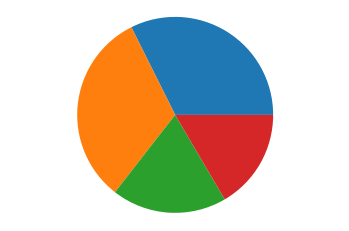

In [10]:
import matplotlib.pyplot as plt

f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])

plt.pie(row[4:8])
plt.axis('equal')
plt.show()

* 어떤 역에 대한 차트인지 정보가 부족.
* 비율을 수치로 정확하게 나타났으면 좋겠음

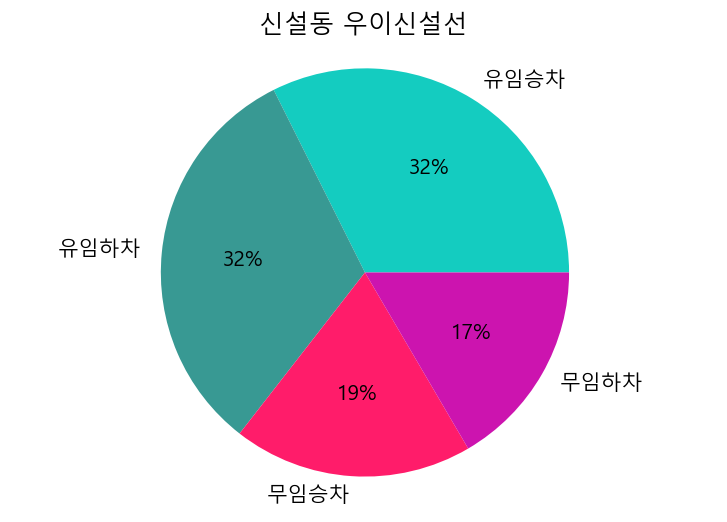

In [16]:
f=open('subwayfee.csv')
data=csv.reader(f)
next(data)

c=['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
plt.rc('font', family='Malgun Gothic')

label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data :
    for i in range(4,8) :
        row[i] = int(row[i])

plt.figure(dpi=150)
plt.title(row[3]+' '+row[1])
plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
plt.show()